In [53]:
from typing import TypedDict, List, Dict
from langgraph.graph import StateGraph
import math

In [54]:
class AgentState(TypedDict):
    name: str
    values: list
    operation: str
    result: str

def operator_node(state : AgentState) -> AgentState:
    """ This node calculates the result of the operation"""
    if state["operation"] == "+":
        state["result"] = f"Hi {state['name']}, your answer is: {sum(state['values'])}"
    elif state["operation"] == "*":
        state["result"] = f"Hi {state['name']}, your answer is: {math.prod(state['values'])}"
    else:
        state["result"] = "Invalid!"
    return state

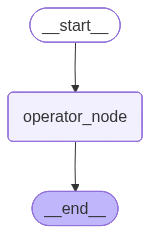

In [55]:
graph = StateGraph(AgentState)  
graph.add_node("operator_node", operator_node)
graph.set_entry_point("operator_node")
graph.set_finish_point("operator_node")

app = graph.compile()

from IPython.display import display, Image
display(Image(app.get_graph().draw_mermaid_png()))


In [60]:
answer = app.invoke({"name": "John", "values": [1, 2, 3, -5], "operation": "+"})
print(answer["result"])

Hi John, your answer is: 1
